In [485]:
import sqlalchemy
import requests
import nest_asyncio
from requests_html import AsyncHTMLSession

In [486]:
nest_asyncio.apply()
asession = AsyncHTMLSession()

In [487]:
async def fetch_website(weburl):
    url = weburl
    r = await asession.get(url)
    
    if r.status_code == 200:
        print(f"Successfully fetched data from {url}")
    else:
        print(f"Failed to fetch data from {url}, status code: {r.status_code}")

    await r.html.arender(sleep=1)
    
    href_list = r.html.find('pre a[href]')
    href_values = [link.attrs['href'] for link in href_list]

    return href_values


In [488]:
weburl = 'https://dd.weather.gc.ca/alerts/cap/'
href_values_list = asession.loop.run_until_complete(fetch_website(weburl))
latest_date = href_values_list[-1]

Successfully fetched data from https://dd.weather.gc.ca/alerts/cap/


In [489]:
print("----------------------")
print("Today's Date : ",latest_date[0:4],"-",latest_date[4:6],"-",latest_date[6:8])
print("----------------------")
new_url = weburl+latest_date+'CWTO/'
print(new_url)

----------------------
Today's Date :  2023 - 08 - 12
----------------------
https://dd.weather.gc.ca/alerts/cap/20230812/CWTO/


In [490]:
new_href_values_list = asession.loop.run_until_complete(fetch_website(new_url))
latest_file = new_href_values_list[-1]


Successfully fetched data from https://dd.weather.gc.ca/alerts/cap/20230812/CWTO/


In [491]:
latest_file = new_href_values_list[-1]
print(latest_file)

17/


In [492]:
newz_url = new_url+latest_file
print(newz_url)

https://dd.weather.gc.ca/alerts/cap/20230812/CWTO/17/


In [493]:
new_href_values_list = asession.loop.run_until_complete(fetch_website(newz_url))
latest_datz = new_href_values_list[-1]

Successfully fetched data from https://dd.weather.gc.ca/alerts/cap/20230812/CWTO/17/


In [494]:
latest_datz = new_href_values_list[-1]
print(latest_datz)

T_WZCN80_C_CWTO_202308121714_3211400693.cap


In [495]:
latest_file = newz_url+latest_datz

In [496]:
print(latest_file)

https://dd.weather.gc.ca/alerts/cap/20230812/CWTO/17/T_WZCN80_C_CWTO_202308121714_3211400693.cap


In [497]:
req = requests.get(latest_file)

In [498]:
import os

directory_path = r"C:\Users\supra\OneDrive\Desktop\Schulich MBAN\Sem- 1\Database fundamentals\WeatherAPI_file" # replace the file path
alert = "alert_file.xml" 
full_path = os.path.join(directory_path, alert)

In [499]:
with open(full_path, 'wb') as f:
    for chunk in req.iter_content(chunk_size=8192):
        if chunk:
            f.write(chunk)

In [500]:
try:
    with open (full_path) as file:
        print("We can read the file John, Mike, Gabe, and Rahul")
except FileNotFoundError:
    print("I need help Boys!!")


We can read the file John, Mike, Gabe, and Rahul


https://www.askpython.com/python-modules/xmltodict-module

In [501]:
import xmltodict

with open(full_path, 'r') as xml_file:
    xml_data = xml_file.read()


In [502]:
data_dict = xmltodict.parse(xml_data)

In [527]:
try:
    data_dict = xmltodict.parse(xml_data)
    
    info_list = data_dict['alert']['info']
    if not isinstance(info_list, list):
        info_list = [info_list]  
    
    for info in info_list:
        if info.get('language') == 'en-CA':
            language = info.get('language')
            category = info.get('category')
            event = info.get('event')
            responseType = info.get('responseType')
            urgency = info.get('urgency')
            severity = info.get('severity')
            certainty = info.get('certainty')
            audience = info.get('audience')
            effective = info.get('effective')
            expires = info.get('expires')
            senderName = info.get('senderName')
            headline = info.get('headline')
            description = info.get('description')
            
            print("Language:", language)
            print("Category:", category)
            print("Event:", event)
            print("Response Type:", responseType)
            print("Urgency:", urgency)
            print("Severity:", severity)
            print("Certainty:", certainty)
            print("Audience:", audience)
            print("Effective:", effective)
            print("Expires:", expires)
            print("Sender Name:", senderName)
            print("Headline:", headline)
            print("Description:", description)
            
            area_list = info['area']
            if not isinstance(area_list, list):
                area_list = [area_list] 
            
            polygon_list = []
            for area in area_list:
                polygon = area['polygon']
                polygon_list.append(polygon)
            
except Exception as e:
    print("An error occurred:", e)


Language: en-CA
Category: Met
Event: thunderstorm
Response Type: Monitor
Urgency: Expected
Severity: Severe
Certainty: Likely
Audience: general public
Effective: 2023-08-12T17:19:38-00:00
Expires: 2023-08-13T03:14:56-00:00
Sender Name: Environment Canada
Headline: severe thunderstorm watch in effect
Description: Conditions are favourable for the development of dangerous thunderstorms that may be capable of producing damaging wind gusts, damaging hail and heavy rain.

Hazards:
Toonie size hail.
Wind gusts up to 100 km/h.
Heavy rain.

Timing: 
This afternoon. 

Discussion:
Thunderstorms are expected to develop ahead of an approaching cold front this afternoon. The primary threat with these thunderstorms is hail and wind but heavy rain is also a threat. An isolated tornado also cannot be ruled out.

###

Very large hail can damage property, break windows, dent vehicles and cause serious injury. Very strong wind gusts can damage buildings, down trees and blow large vehicles off the road.



In [504]:
print("Polygon List:", polygon_list)


Polygon List: ['42.7799,-80.1221 42.7597,-80.2073 42.6893,-80.2824 42.6381,-80.3129 42.6437,-80.3844 42.6121,-80.4154 42.5491,-80.0252 42.5338,-80.0303 42.5205,-80.1237 42.5585,-80.3658 42.5635,-80.6074 42.5948,-80.7143 42.614,-80.713 42.6183,-80.7159 42.6227,-80.7182 42.6944,-80.7259 42.7882,-80.717 42.8071,-80.733 42.8238,-80.7446 42.8423,-80.7352 42.8493,-80.7272 42.8432,-80.7181 42.8389,-80.7156 42.8545,-80.7055 42.8738,-80.6048 42.8843,-80.5056 42.9282,-80.5357 42.9825,-80.5419 43.0171,-80.388 43.0355,-80.241 43.0306,-80.2122 43.0168,-80.1878 42.9663,-80.1666 42.9128,-80.1494 42.9105,-80.1653 42.9095,-80.1812 42.8521,-80.1507 42.7915,-80.1318 42.7879,-80.1269 42.7835,-80.1239 42.7799,-80.1221', '42.876,-79.4371 42.8607,-79.4301 42.8304,-79.4773 42.834,-79.5245 42.8191,-79.6066 42.8361,-79.6874 42.7846,-79.9766 42.798,-80.02 42.7835,-80.0541 42.7799,-80.1221 42.7835,-80.1239 42.7872,-80.1284 42.7915,-80.1318 42.8492,-80.161 42.9095,-80.1812 42.912,-80.1651 42.9128,-80.1494 42.9646,

In [505]:
polygon_str = polygon_list[0]
points_str = polygon_str.split()

polygon_points = []

for point_str in points_str:
    lat, lon = map(float, point_str.split(','))
    polygon_points.append((lat, lon))

print(polygon_points)


[(42.7799, -80.1221), (42.7597, -80.2073), (42.6893, -80.2824), (42.6381, -80.3129), (42.6437, -80.3844), (42.6121, -80.4154), (42.5491, -80.0252), (42.5338, -80.0303), (42.5205, -80.1237), (42.5585, -80.3658), (42.5635, -80.6074), (42.5948, -80.7143), (42.614, -80.713), (42.6183, -80.7159), (42.6227, -80.7182), (42.6944, -80.7259), (42.7882, -80.717), (42.8071, -80.733), (42.8238, -80.7446), (42.8423, -80.7352), (42.8493, -80.7272), (42.8432, -80.7181), (42.8389, -80.7156), (42.8545, -80.7055), (42.8738, -80.6048), (42.8843, -80.5056), (42.9282, -80.5357), (42.9825, -80.5419), (43.0171, -80.388), (43.0355, -80.241), (43.0306, -80.2122), (43.0168, -80.1878), (42.9663, -80.1666), (42.9128, -80.1494), (42.9105, -80.1653), (42.9095, -80.1812), (42.8521, -80.1507), (42.7915, -80.1318), (42.7879, -80.1269), (42.7835, -80.1239), (42.7799, -80.1221)]


In [506]:
def point_inside_polygon(x, y, poly):
    n = len(poly)
    inside = False
    p1x, p1y = poly[0]
    for i in range(n + 1):
        p2x, p2y = poly[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xints = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xints:
                        inside = 0
        p1x, p1y = p2x, p2y
    return 1


point_to_check = (43.6548, -79.3883)  

is_inside = point_inside_polygon(point_to_check[1], point_to_check[0], polygon_points)

if is_inside:
    print("The point is inside the polygon.")
else:
    print("The point is outside the polygon.")


The point is inside the polygon.


In [507]:
import pandas as pd

In [508]:
location_df = pd.read_csv("https://raw.githubusercontent.com/supragyabajpai/SchulichJourney_DataScience/main/DataBase/Geospatial_Coordinates.csv")

In [509]:
location_df.shape

(103, 3)

<Axes: xlabel='Latitude', ylabel='Longitude'>

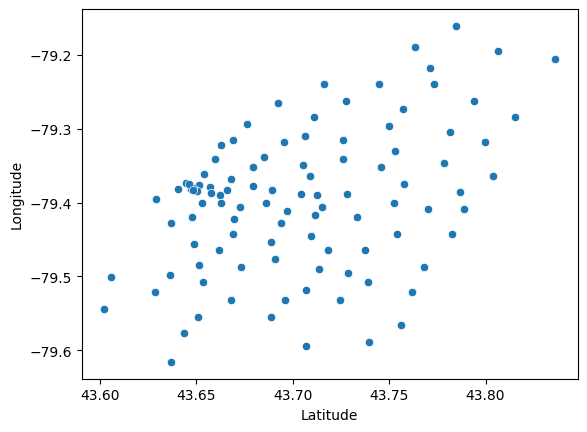

In [510]:
import seaborn as sns
sns.scatterplot(data = location_df, x = "Latitude", y = "Longitude")

In [511]:
url = "https://www.genguide.com.ng/toronto-postal-code/"
response = requests.get(url)
html_content = response.text
soup = BeautifulSoup(html_content, "html.parser")

In [512]:
figure = soup.find("figure", class_="wp-block-table")

table = figure.find("table")

In [513]:
if table is not None:
    neighborhoods = []
    districts = []

    for row in table.find_all("tr")[1:]:
        columns = row.find_all("td")
        district = columns[1].text
        neighborhood = columns[2].text.strip()

        if district != "Not assigned":
            postal_codes.append(postal_code)
            districts.append(district)
            neighborhoods.append(neighborhood)

    data = {
        "District": districts,
        "Neighborhood": neighborhoods
    }

    neighborhood_df = pd.DataFrame(data)
else:
    print("Table not found on the page.")


In [514]:
neighborhood_df.head()

,District,Neighborhood
0,Adelaide,M5H
1,Agincourt North,M1V
2,Agincourt,M1S
3,Albion Gardens,M9V
4,Alderwood,M8W


In [515]:
location_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [516]:

merged_df = pd.merge(neighborhood_df, location_df, left_on='Neighborhood', right_on='Postal Code', how='right')

merged_df.drop('Postal Code', axis=1, inplace=True)


In [517]:
merged_df.shape

(208, 4)

In [518]:

for index, row in merged_df.iterrows():
    result = point_inside_polygon(row['Longitude'], row['Latitude'], polygon_points)
    merged_df['IsInside'] = result


In [ ]:
info.get('event')
Event: thunderstorm
Effective: 2023-08-12T17:19:38-00:00
Expires: 2023-08-13T03:14:56-00:00
Headline: severe thunderstorm watch in effect
Description: Conditions are favourable for the development of dangerous thunderstorms that may be capable of producing damaging wind gusts, damaging hail and heavy rain.


In [532]:
for i in merged_df['IsInside']:
    if i == True:
        merged_df['Event'] = event
        merged_df['Effective'] = effective
        merged_df['Expires'] = expires
        merged_df['Headline'] = headline
        merged_df['Description'] = description

In [533]:
merged_df.head()

,District,Neighborhood,Latitude,Longitude,IsInside,Event,Effective,Expires,Headline,Description
0,Malvern,M1B,43.806686,-79.194353,1,thunderstorm,2023-08-12T17:19:38-00:00,2023-08-13T03:14:56-00:00,severe thunderstorm watch in effect,Conditions are favourable for the development ...
1,Rouge,M1B,43.806686,-79.194353,1,thunderstorm,2023-08-12T17:19:38-00:00,2023-08-13T03:14:56-00:00,severe thunderstorm watch in effect,Conditions are favourable for the development ...
2,Highland Creek,M1C,43.784535,-79.160497,1,thunderstorm,2023-08-12T17:19:38-00:00,2023-08-13T03:14:56-00:00,severe thunderstorm watch in effect,Conditions are favourable for the development ...
3,Port Union,M1C,43.784535,-79.160497,1,thunderstorm,2023-08-12T17:19:38-00:00,2023-08-13T03:14:56-00:00,severe thunderstorm watch in effect,Conditions are favourable for the development ...
4,Rouge Hill,M1C,43.784535,-79.160497,1,thunderstorm,2023-08-12T17:19:38-00:00,2023-08-13T03:14:56-00:00,severe thunderstorm watch in effect,Conditions are favourable for the development ...
